# BGG review score prediction: deep learning approach (YH)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/clean_data.csv')
df = df.drop_duplicates()
df.head()

,Unnamed: 0.1,Unnamed: 0,user,rating,comment,ID,name
0,4108284,4108284,PegasusGamesNYC,2.0,Played it once and didn't like it,9209,Ticket to Ride
1,9412682,9412682,captaincomic,4.0,Several things to dislike: Player elimination;...,24068,Shadow Hunters
2,3448962,3448962,jblomquist,4.0,Seems like an ok game but it doesn't really wo...,150376,Dead of Winter: A Crossroads Game
3,10640158,10640158,Rothro,3.0,Flux and Munchkin mixed but worse. Way way way...,234190,Unstable Unicorns
4,14938520,14938520,armourer84,3.0,The game open the player to be sieged by group...,6281,Eketorp


In [3]:
X = df['comment']
y = df['rating']

0                        Played it once and didn't like it
1        Several things to dislike: Player elimination;...
2        Seems like an ok game but it doesn't really wo...
3        Flux and Munchkin mixed but worse. Way way way...
4        The game open the player to be sieged by group...
                               ...                        
99995    as you get a little more familiar with it you ...
99996    This is a fun, fast, and clever game.  It feel...
99997                                              Amazing
99998    Nice one :) First off, i bought it to play sol...
99999    Kids rating  My daughter enjoys this one a lot...
Name: comment, Length: 100000, dtype: object

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

### Let's tokenize the vocabulary 
tk = Tokenizer()
tk.fit_on_texts(X)
vocab_size = len(tk.word_index)
print(f'There are {vocab_size} different words in your corpus')
X_token = tk.texts_to_sequences(X)

2022-09-16 14:14:56.438843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 14:14:56.582213: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 14:14:56.582249: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-16 14:14:56.624497: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-16 14:14:57.304064: W tensorflow/stream_executor/platform/de

There are 82297 different words in your corpus


39.87476


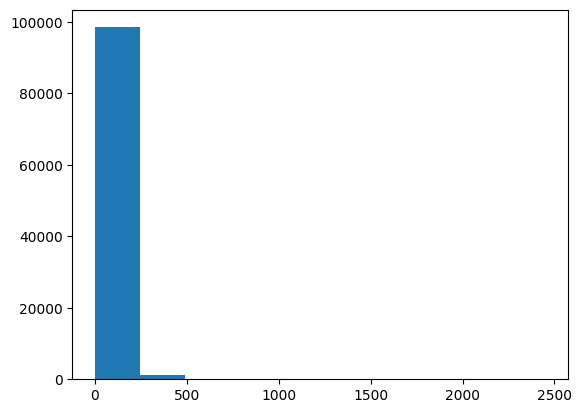

In [6]:
import matplotlib.pyplot as plt
lengths = [len(each) for each in X_token]
print(pd.Series(lengths).mean())
plt.hist(lengths);